In [1]:
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import pandas as pd
import seaborn as sns
from scipy.spatial import ConvexHull
import geojson
import numpy as np
import geopandas
import geodatasets
import wordcloud as wc
from PIL import Image
import folium

C:\Users\jerem\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
LISTINGS = 'listings.csv'
NUMBERS = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [3]:
listings = pd.read_csv(LISTINGS)

In [4]:
listings['bathrooms'] = listings['bathrooms_text'].apply(lambda x: x.split(" ")[0] if type(x) == str else 0)
listings['bathrooms'] = listings['bathrooms'].apply(lambda x: float(x) if str(x)[0] in NUMBERS else np.nan)
listings['bathrooms'] = listings['bathrooms'].dropna()

In [5]:
fig = px.scatter(listings, x='bathrooms', y='review_scores_value')
fig.show()

In [22]:
fig = px.histogram(listings, x='review_scores_value', barmode='group', histnorm="percent")
fig.show()

C:\Users\jerem\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\jerem\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\jerem\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\jerem\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



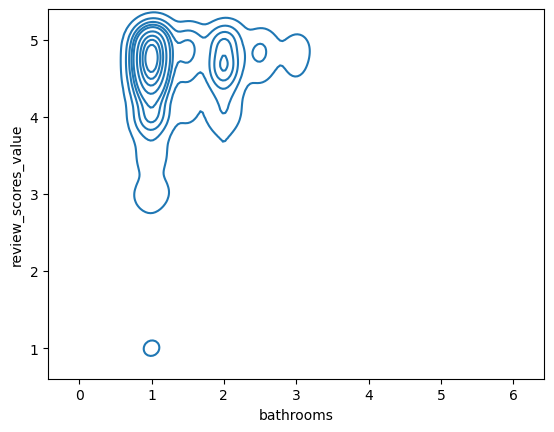

In [7]:
sns.kdeplot(listings, x='bathrooms', y='review_scores_value')
plt.show()

In [8]:
fig = px.scatter_mapbox(listings, lat="latitude", lon="longitude", color="neighbourhood_cleansed", zoom=9)
fig.update_layout(mapbox_style="carto-positron", mapbox_zoom=9, mapbox_center={"lat": 42.3584, "lon": -71.05977})

fig.show()


In [9]:
#print(boundary_geo)

In [18]:
boston = geopandas.read_file("Boston_Neighborhood_Boundaries_approximated_by_2020_Census_Block_Groups/Boston_Neighborhood_Boundaries_approximated_by_2020_Census_Block_Groups.shp")
boston_neighborhoods = boston[["blockgr202", "geometry"]]
neighborhood_agg = listings.groupby("neighbourhood_cleansed", as_index=False)["review_scores_value"].mean()
geometry = pd.merge(boston, neighborhood_agg, left_on = "blockgr202", right_on = "neighbourhood_cleansed")


In [21]:
review = geometry.explore(column = "review_scores_value", legend=True, name="Boston AirBnB Reviews", 
                          tooltip='review_scores_value', popup=['neighbourhood_cleansed'])
review

C:\Users\jerem\anaconda3\lib\site-packages\geopandas\explore.py:395: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



In [12]:
listings["neighborhood_overview"] = str(listings["neighborhood_overview"])
words = " ".join(list(listings["neighborhood_overview"]))
print(str(listings["neighborhood_overview"]))

0       0       Mostly quiet ( no loud music, no crowe...
1       0       Mostly quiet ( no loud music, no crowe...
2       0       Mostly quiet ( no loud music, no crowe...
3       0       Mostly quiet ( no loud music, no crowe...
4       0       Mostly quiet ( no loud music, no crowe...
                              ...                        
4199    0       Mostly quiet ( no loud music, no crowe...
4200    0       Mostly quiet ( no loud music, no crowe...
4201    0       Mostly quiet ( no loud music, no crowe...
4202    0       Mostly quiet ( no loud music, no crowe...
4203    0       Mostly quiet ( no loud music, no crowe...
Name: neighborhood_overview, Length: 4204, dtype: object


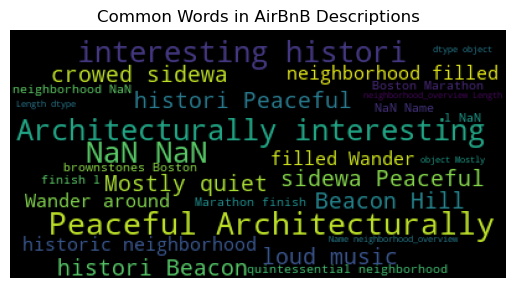

In [13]:
cloud = wc.WordCloud()
listings_cloud = cloud.generate(words)
plt.axis('off')
plt.title('Common Words in AirBnB Descriptions')
plt.imshow(listings_cloud)
plt.show()